# Implementation of Fourier series and FFT from scratch
In this code top 10 dominated frequencies are found from the given dataset of time and signal values and plotting of Magnitude VS Frequenciy plot for frequency in the range 10 to 1000 Hz

In [69]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Import data from signal.inp file and process it

In [76]:
df = pd.read_csv('signal.inp', header=None, sep='\s+')
df.dropna(axis=1, inplace=True)
df.drop(index=0, inplace=True)
df.columns = ['time', 'signal_value']
time = df['time']
signal_values = df['signal_value']
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_7696\407023894.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('signal.inp', header=None, sep='\s+')


,time,signal_value
1,0.000000e+00,0.000000e+00
2,1.001001e-04,1.660427e-01
3,2.002002e-04,3.191164e-01
4,3.003003e-04,4.360532e-01
5,4.004004e-04,5.177753e-01


Plotting the given siganl values from dataset with their respective Time

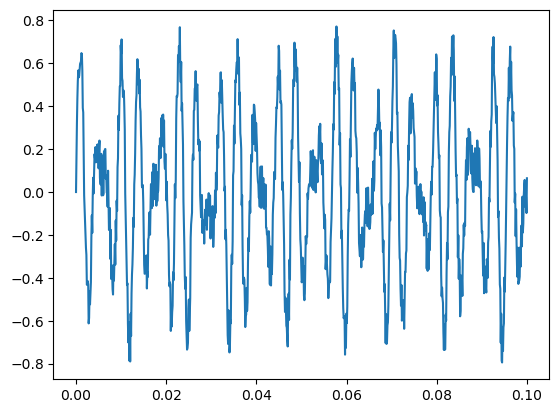

In [71]:
df['time'] = df['time'].astype(float)
df['signal_value'] = df['signal_value'].astype(float)
time = df['time']
signal_values = df['signal_value']
plt.plot(time, signal_values)
plt.show()

In [72]:
frequencies = np.linspace(10, 1000, 991)



Integration using trapz function in Numpy

In [73]:
G_f = np.zeros(len(frequencies))
for i, f in enumerate(frequencies):
    integrand = signal_values * np.exp(-2j * np.pi * f * time)
    G_f[i] = np.trapz(integrand, time)


    

C:\Users\HP\AppData\Local\Temp\ipykernel_7696\1635893125.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  G_f[i] = np.trapz(integrand, time)
C:\Users\HP\AppData\Local\Temp\ipykernel_7696\1635893125.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  G_f[i] = np.trapz(integrand, time)


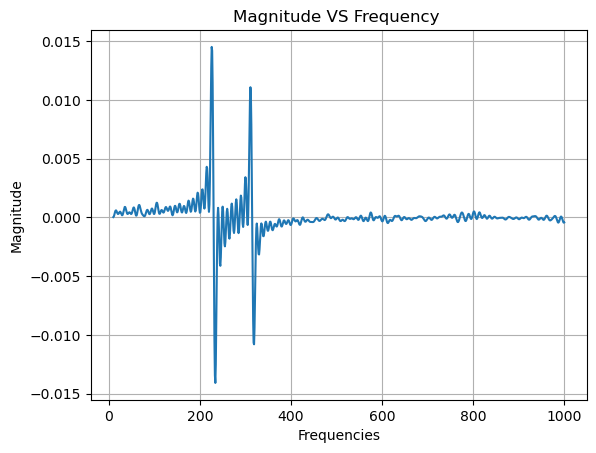

In [74]:
fig1, ax1 = plt.subplots()
ax1.plot(frequencies, G_f)
ax1.grid(True)
ax1.set_xlabel('Frequencies')
ax1.set_ylabel('Magnitude')
ax1.set_title('Magnitude VS Frequency ')
plt.show()

Top 10 dominant frequencies and their respective magnitudes

In [75]:
sorted_G = np.sort(np.abs(G_f))[::-1]
for i in range(10):
    print(f'{i+1}th dominant magnitude: {sorted_G[i]}')
    index = np.where(np.abs(G_f) == sorted_G[i])[0][0]
    print('Dominant frequency: ', frequencies[index])

1th dominant magnitude: 0.014521186394264802
Dominant frequency:  226.0
2th dominant magnitude: 0.014195875926156065
Dominant frequency:  227.0
3th dominant magnitude: 0.014096759443016577
Dominant frequency:  234.0
4th dominant magnitude: 0.013449639160487352
Dominant frequency:  233.0
5th dominant magnitude: 0.012763360660050843
Dominant frequency:  225.0
6th dominant magnitude: 0.012486230858200465
Dominant frequency:  235.0
7th dominant magnitude: 0.011516488553677312
Dominant frequency:  228.0
8th dominant magnitude: 0.011086890369552984
Dominant frequency:  311.0
9th dominant magnitude: 0.01080564399381757
Dominant frequency:  319.0
10th dominant magnitude: 0.010675229243465735
Dominant frequency:  318.0
